In [65]:
# importations
import mne, fooof, numpy as np, pandas as pd, os, glob, sys
from mne.preprocessing import ICA
from IPython.display import display, Markdown
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

Reading /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub22_ses00_noica-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated


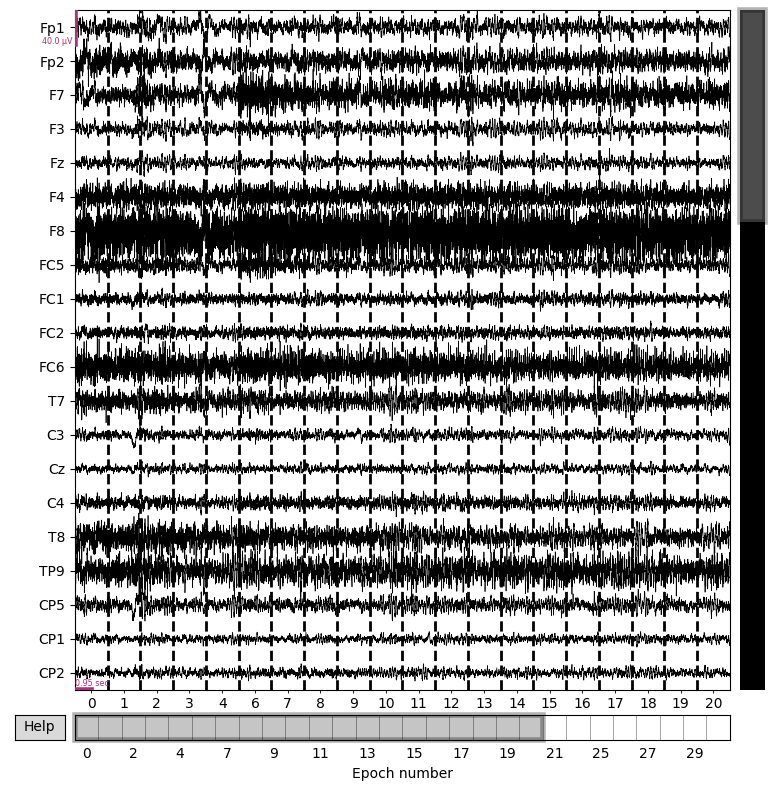

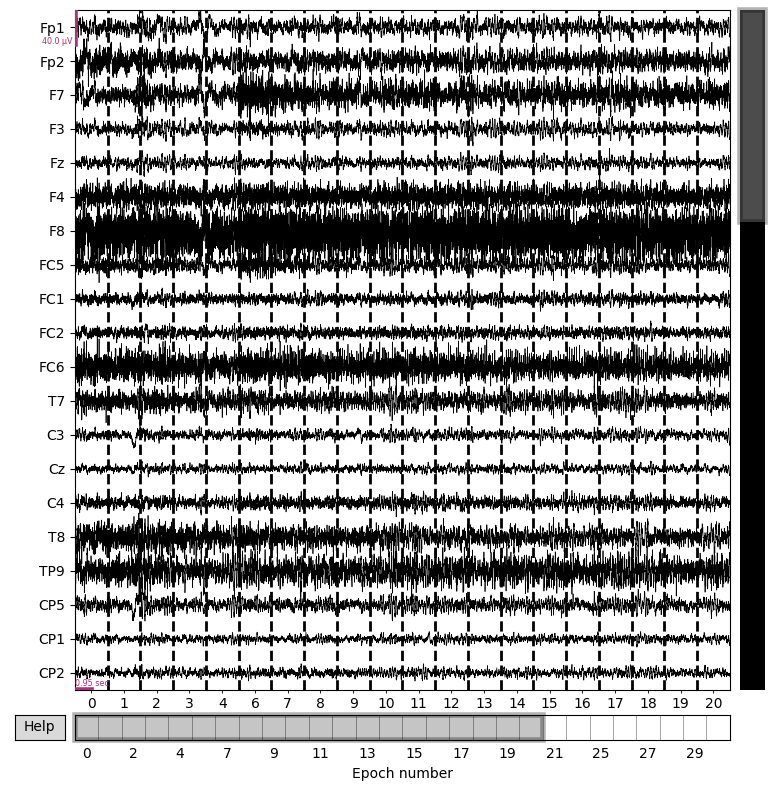

In [66]:
processed_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub22_ses00_noica-epo.fif'
epochs = mne.read_epochs(processed_dir)
epochs.plot()

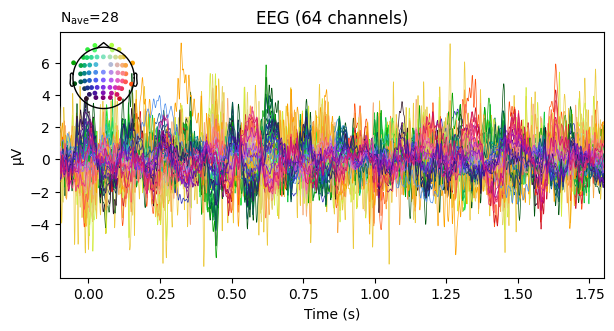

In [68]:
evoked = epochs.copy().average()
evoked.plot();

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


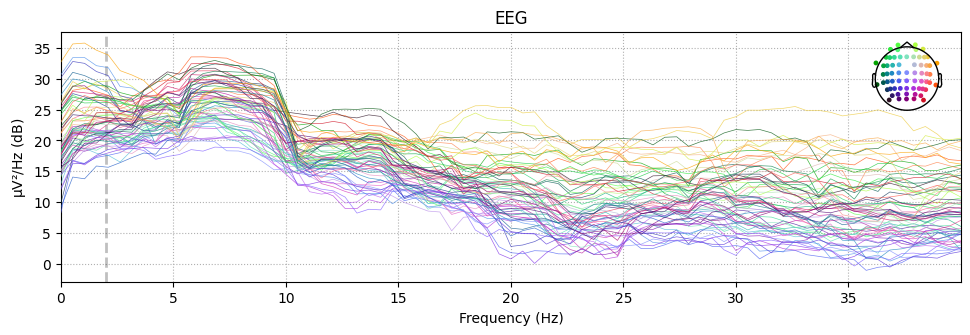

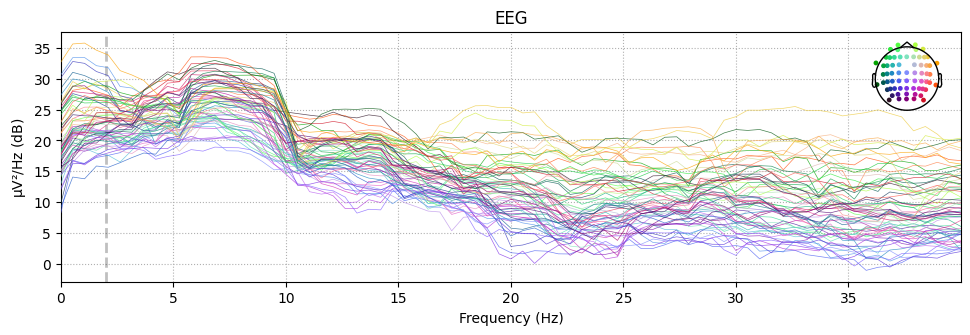

In [71]:
evoked.plot_psd(fmax=40)

In [72]:
evoked_new = evoked.copy().pick_channels(['FC6'])

In [75]:
epo_spectrum = evoked_new.compute_psd(fmax = 50)
psds, freqs = epo_spectrum.get_data(return_freqs=True)

    Using multitaper spectrum estimation with 7 DPSS windows


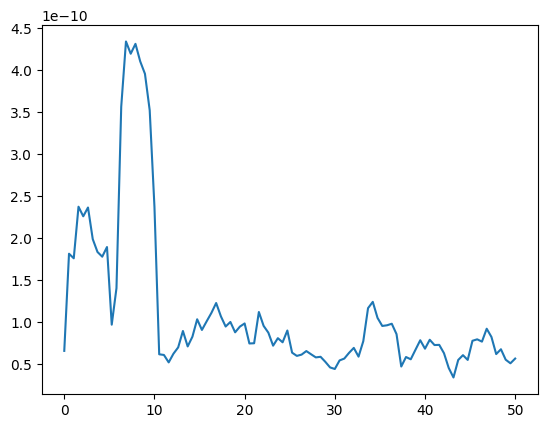

In [76]:
plt.plot(freqs,np.squeeze(psds))


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.53 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 40 Hz                        
                                 Frequency Resolution is 0.53 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

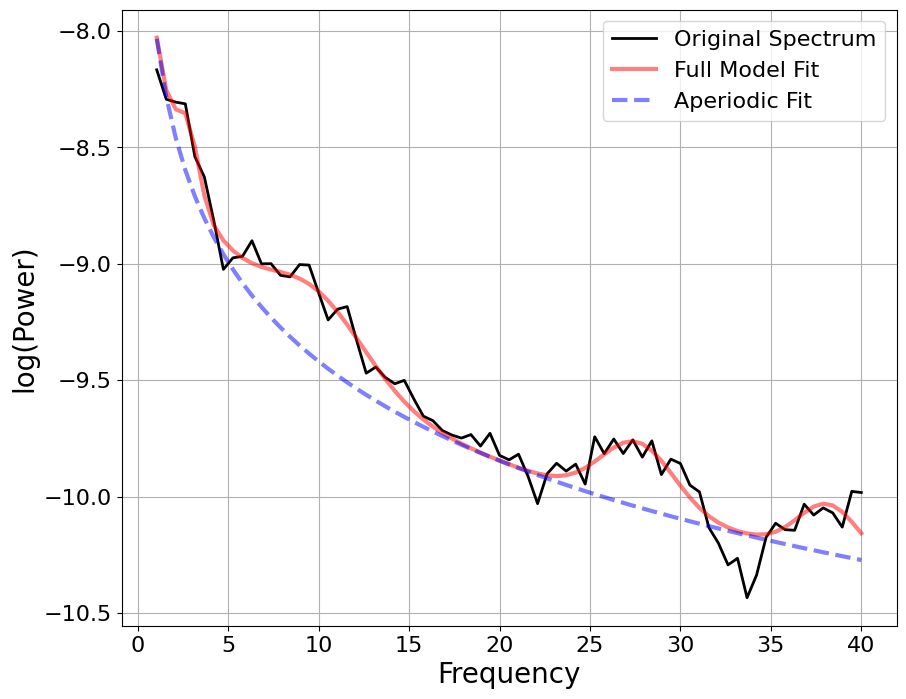

In [56]:
from fooof import FOOOF
from fooof.sim.gen import gen_aperiodic
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_peak_search
# Initialize FOOOF object
fm = FOOOF()

# Define frequency range across which to model the spectrum
freq_range = [1, 40]

# Model the power spectrum with FOOOF, and print out a report
fm.report(freqs, np.squeeze(psds), freq_range)

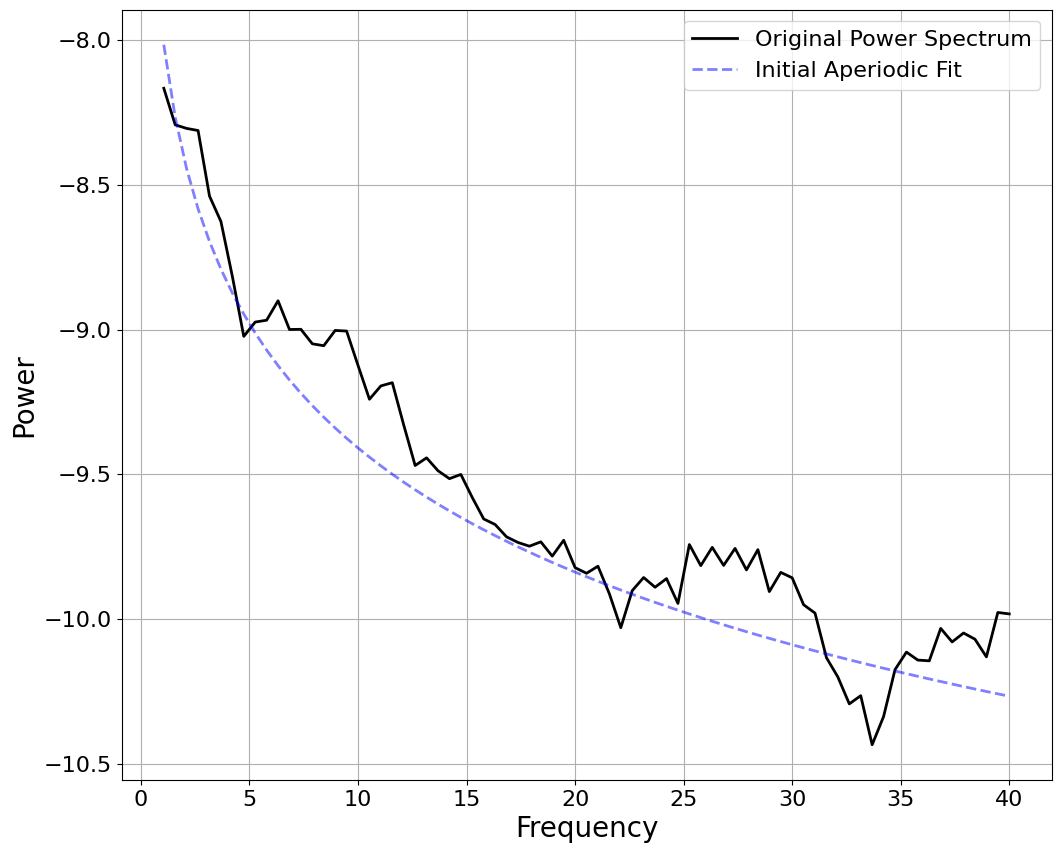

In [57]:
init_ap_fit = gen_aperiodic(fm.freqs, fm._robust_ap_fit(fm.freqs, fm.power_spectrum))
plt_log = False
# Plot the initial aperiodic fit
_, ax = plt.subplots(figsize=(12, 10))
plot_spectrum(fm.freqs, fm.power_spectrum, plt_log,
              label='Original Power Spectrum', color='black', ax=ax)
plot_spectrum(fm.freqs, init_ap_fit, plt_log, label='Initial Aperiodic Fit',
              color='blue', alpha=0.5, linestyle='dashed', ax=ax)


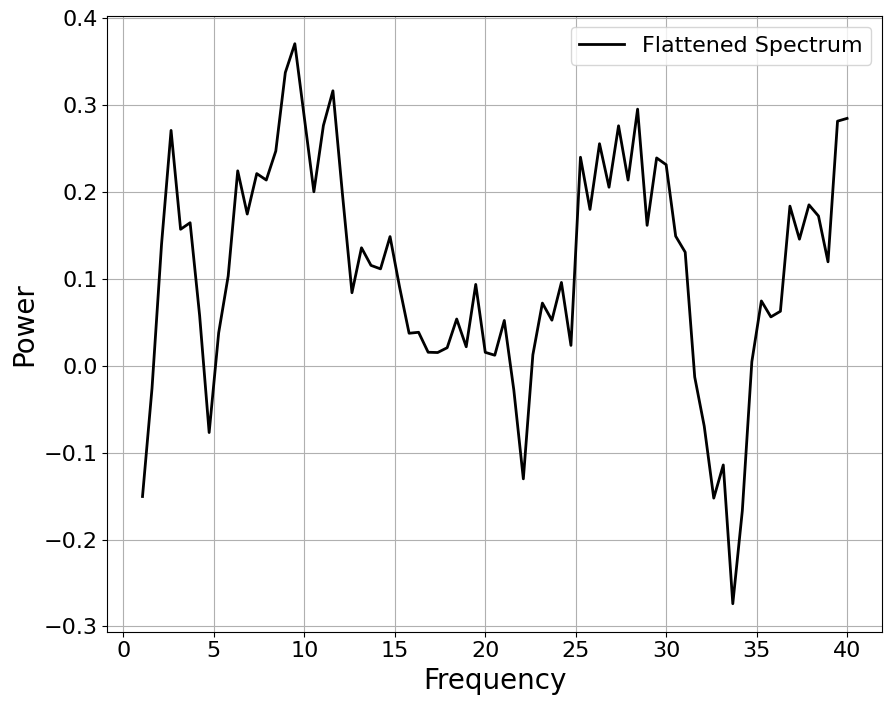

In [58]:
# Recompute the flattened spectrum using the initial aperiodic fit
init_flat_spec = fm.power_spectrum - init_ap_fit

# Plot the flattened the power spectrum
plot_spectrum(fm.freqs, init_flat_spec, plt_log,
              label='Flattened Spectrum', color='black')

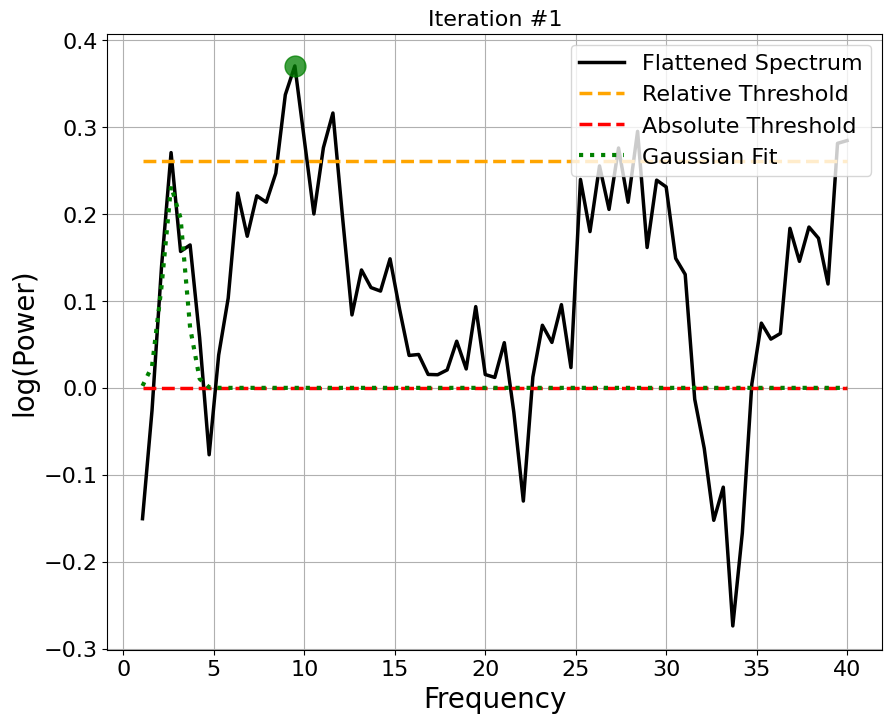

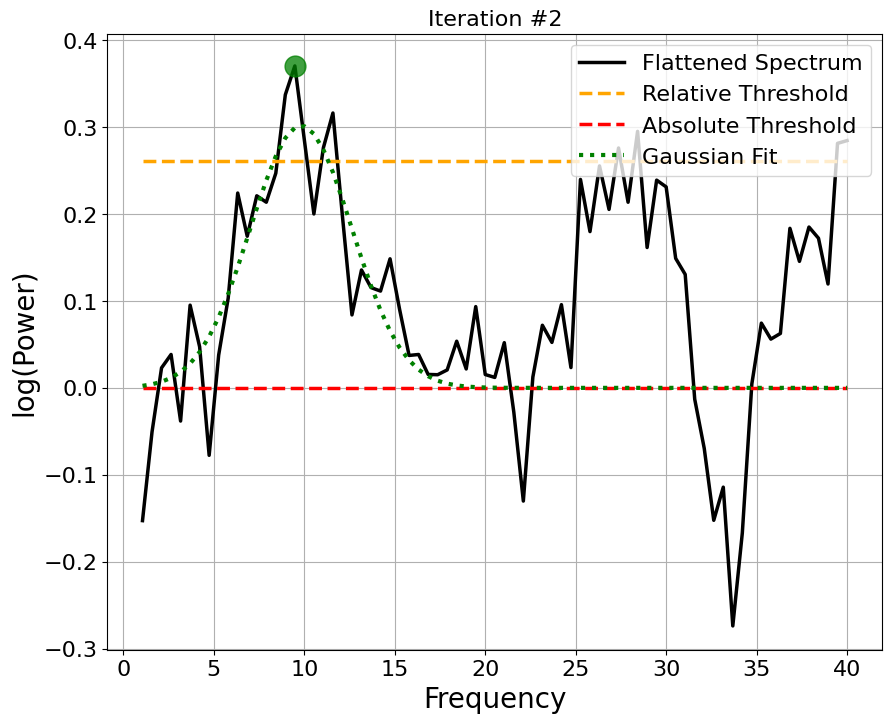

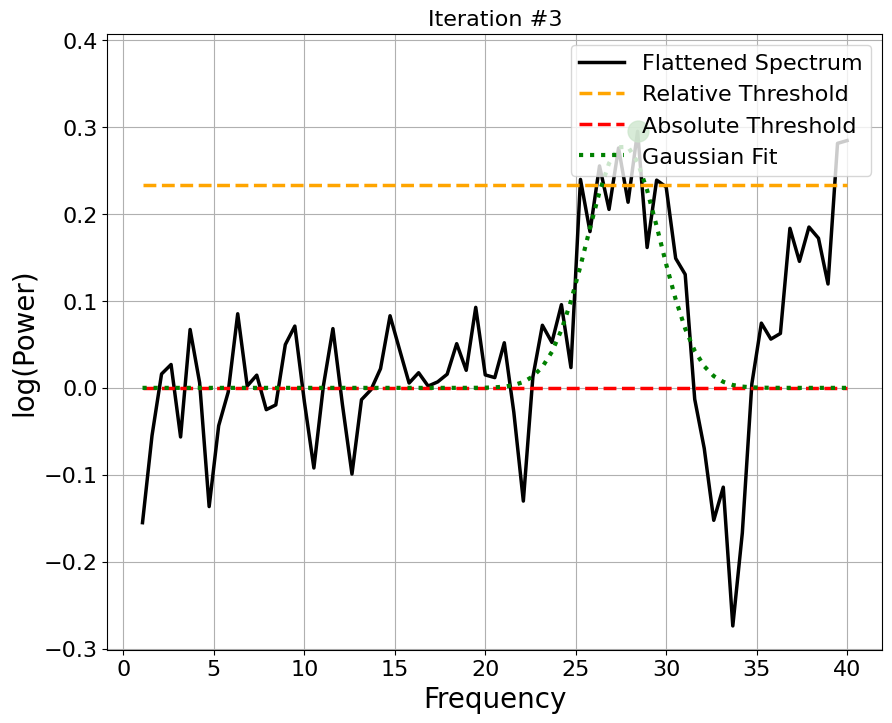

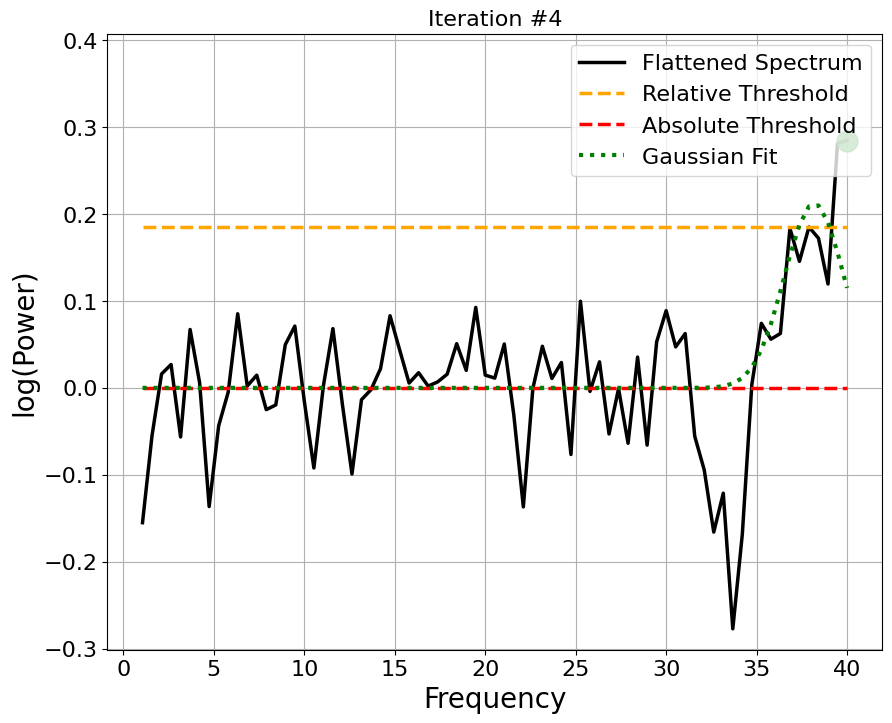

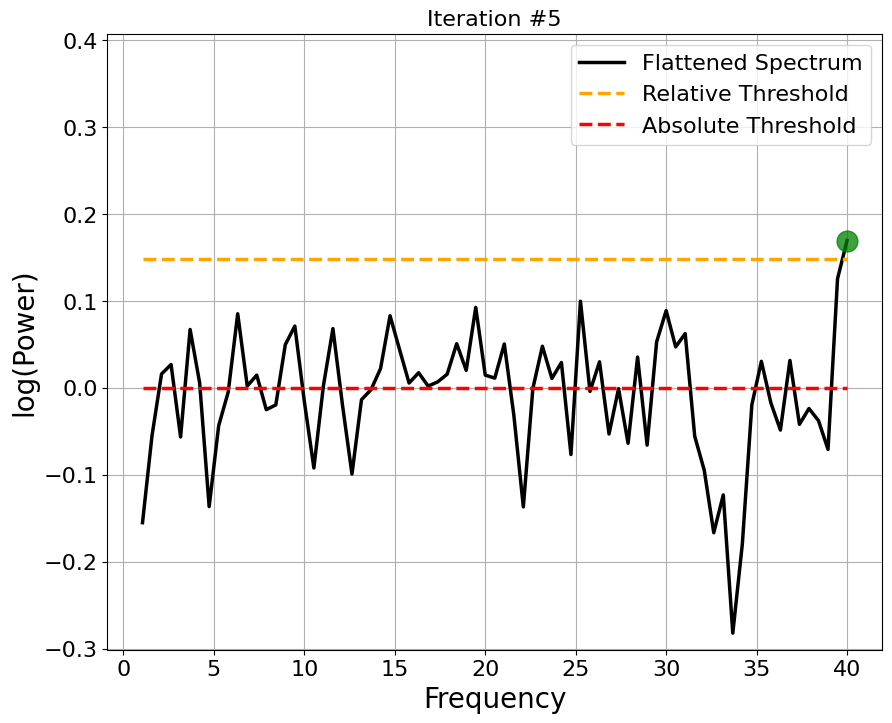

In [59]:
# Plot the iterative approach to finding peaks from the flattened spectrum
plot_annotated_peak_search(fm)

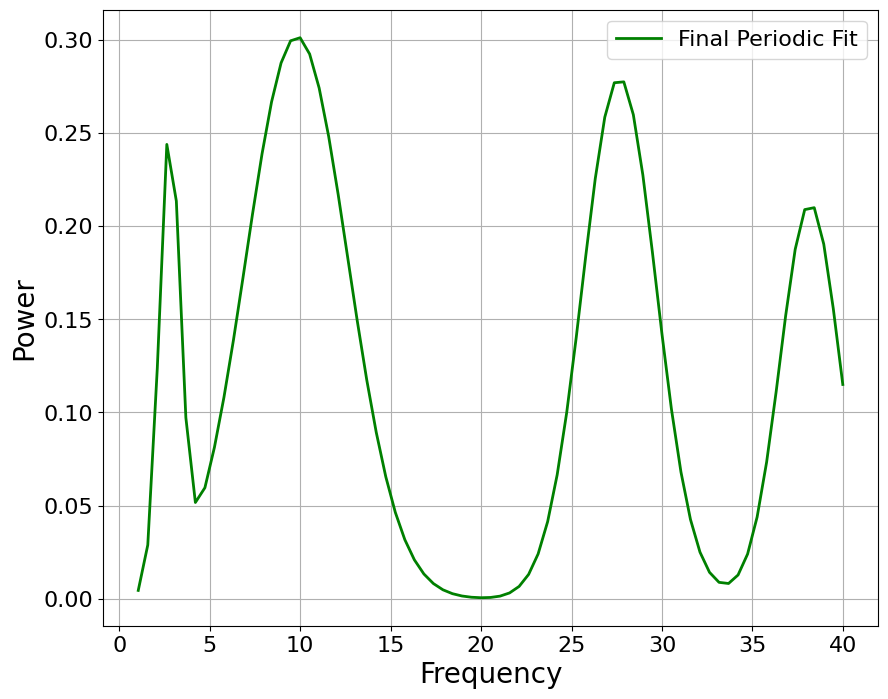

In [60]:
# Plot the peak fit: created by re-fitting all of the candidate peaks together
plot_spectrum(fm.freqs, fm._peak_fit, plt_log, color='green', label='Final Periodic Fit')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Need more than one channel to make topography for eeg. Disabling interactivity.


/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


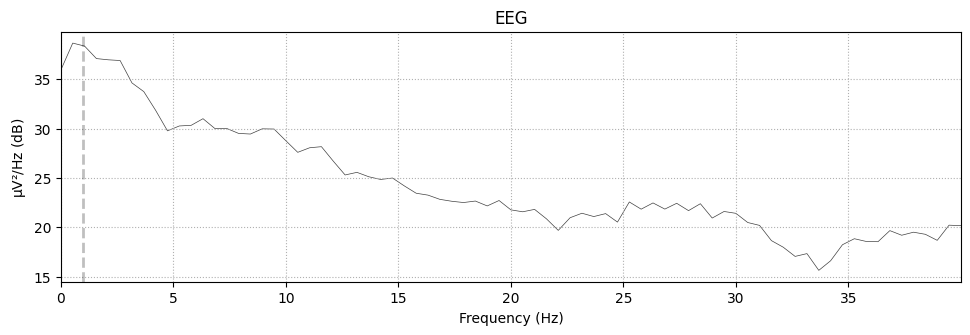

In [10]:
evoked_new.plot_psd(fmax=40)

In [11]:
from scipy import signal

In [27]:
sf = 5000
#win = 4 * sf
freqs, psd = signal.welch(data, sf)

In [31]:
np.squeeze(psd)

array([6.29404506e-15, 3.29515870e-14, 1.77662298e-14, 1.01926174e-14,
       9.71643214e-15, 8.00016881e-15, 2.29853628e-15, 7.65597046e-17,
       1.43720452e-18, 2.16184868e-19, 6.34819086e-20, 2.40416410e-20,
       2.72505716e-20, 8.82680329e-20, 2.84883997e-20, 2.10787460e-21,
       1.33449968e-21, 8.97469834e-22, 8.91871920e-22, 1.49012983e-20,
       1.93898685e-20, 1.50254340e-21, 1.88171671e-22, 1.28245681e-22,
       9.74819524e-23, 1.02451616e-21, 6.18947558e-21, 2.35017398e-21,
       4.36445609e-23, 3.09281424e-23, 3.15661668e-23, 1.91360982e-22,
       1.13796974e-20, 1.87361133e-20, 1.60295681e-21, 2.18505414e-23,
       8.60269942e-24, 7.76864708e-24, 1.71755497e-22, 1.29397632e-21,
       6.19317929e-22, 6.79066971e-24, 3.01045800e-24, 2.71485971e-24,
       2.35437841e-24, 3.75187474e-24, 6.48569473e-24, 1.82922663e-24,
       1.37440043e-24, 1.17522913e-24, 1.23366870e-24, 3.83257801e-24,
       2.57173995e-23, 1.68342405e-23, 7.25490963e-25, 5.85143161e-25,
      

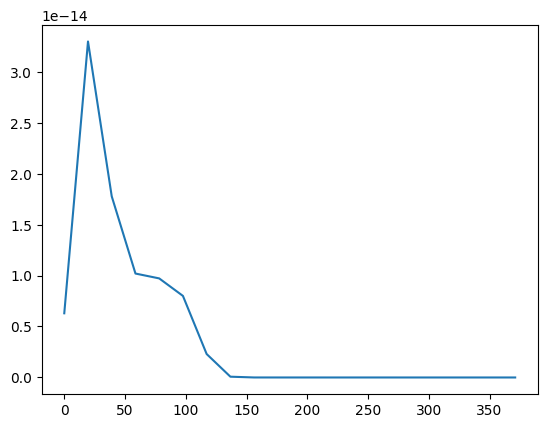

In [40]:
plt.plot(freqs[:20],np.squeeze(psd)[:20])

In [25]:
data = evoked_new.get_data()

In [34]:
mne.viz.set_browser_backend('matplotlib')

Using matplotlib as 2D backend.


'qt'

In [36]:
%matplotlib inline

In [80]:
freqs = np.logspace(*np.log10([6, 50]), num=10)
print(freqs)

[ 6.          7.59389251  9.61120057 12.16440399 15.39586272 19.48575442
 24.66212074 31.21358232 39.50543147 50.        ]


In [108]:
freqs = np.logspace(*np.log10([6, 50]), num=10)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, average=True, decim=3, n_jobs=None)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   12.1s finished


No baseline correction applied


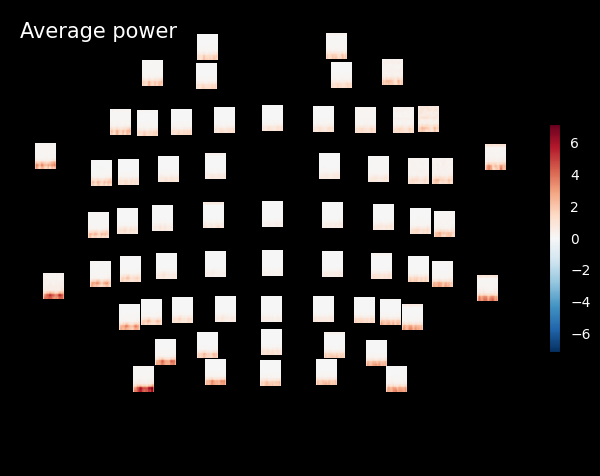

No baseline correction applied


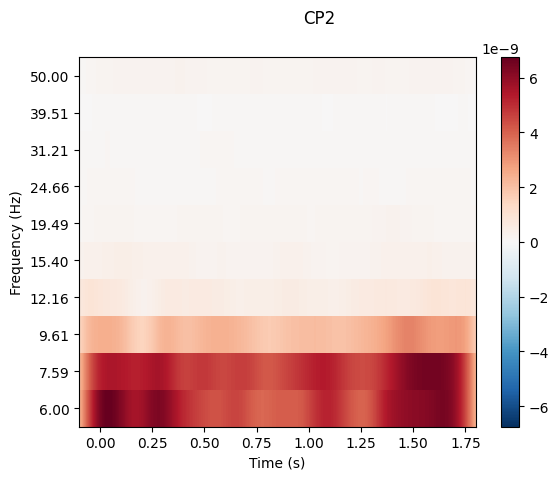

No baseline correction applied
No baseline correction applied


/tmp/ipykernel_4356/4217143137.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


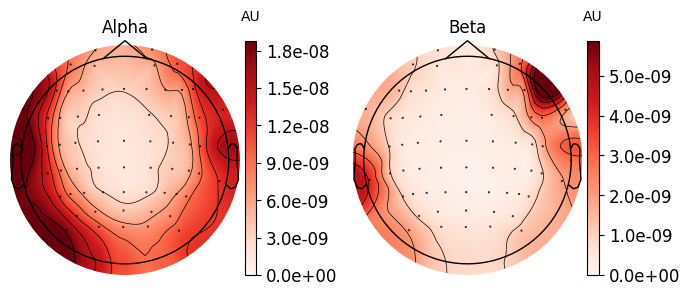

In [109]:
power.plot_topo(baseline=None, mode='logratio', title='Average power')
power.plot([19], baseline=None, mode='logratio', title=power.ch_names[19])

fig, axes = plt.subplots(1, 2, figsize=(7, 4))
topomap_kw = dict(ch_type='eeg', tmin=0.1, tmax=1.8, baseline=None,
                  mode='logratio', show=False)
plot_dict = dict(Alpha=dict(fmin=8, fmax=12), Beta=dict(fmin=13, fmax=25))
for ax, (title, fmin_fmax) in zip(axes, plot_dict.items()):
    power.plot_topomap(**fmin_fmax, axes=ax, **topomap_kw)
    ax.set_title(title)
fig.tight_layout()
fig.show()

Applying baseline correction (mode: logratio)


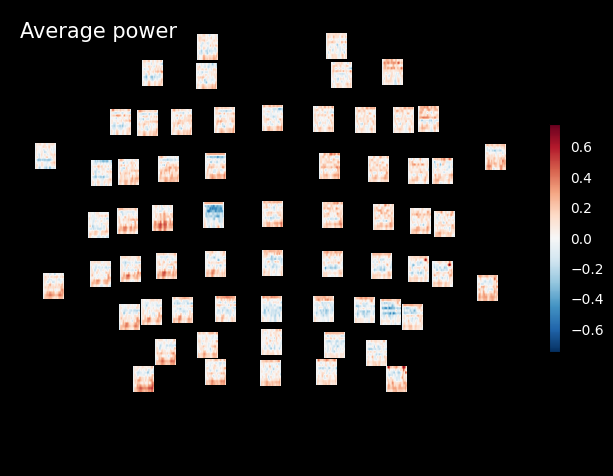

Applying baseline correction (mode: logratio)


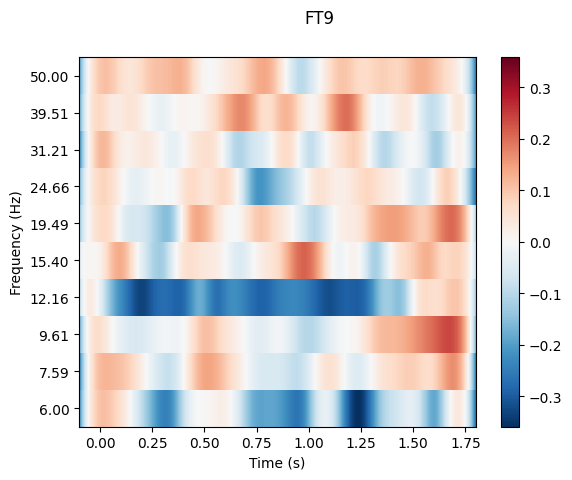

Applying baseline correction (mode: logratio)


/tmp/ipykernel_4356/4286785836.py:5: FutureWarning: The "title" parameter is deprecated and will be removed in version 1.3. Use "fig.suptitle()" instead.
  power.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=12,


Applying baseline correction (mode: logratio)


/tmp/ipykernel_4356/4286785836.py:8: FutureWarning: The "title" parameter is deprecated and will be removed in version 1.3. Use "fig.suptitle()" instead.
  power.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=13, fmax=25,


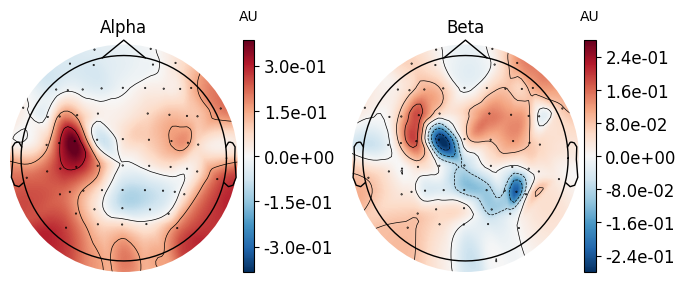

In [110]:
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
power.plot([40], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[40])

fig, axis = plt.subplots(1, 2, figsize=(7, 4))
power.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=12,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[0],
                   title='Alpha', show=False)
power.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=13, fmax=25,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[1],
                   title='Beta', show=False)
mne.viz.tight_layout()
plt.show()

In [93]:
power.copy().pick_channels(['FC6'])

<AverageTFR | time : [-0.100000, 1.799600], freq : [6.000000, 50.000000], nave : 28, channels : 1, ~282 kB>

In [94]:
power.copy().to_data_frame()

,time,freq,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,...,TP8,P5,P1,P2,P6,PO7,PO3,POz,PO4,PO8
0,-0.1000,6.0,6.181234e-09,7.712093e-09,9.124692e-09,4.910893e-09,2.994300e-09,5.527708e-09,6.907742e-09,3.906236e-09,...,9.319902e-09,5.243820e-09,2.253750e-09,3.591776e-09,1.221222e-08,7.864368e-09,5.191723e-09,4.330895e-09,7.606351e-09,1.026772e-08
1,-0.0994,6.0,6.236580e-09,7.793968e-09,9.208087e-09,4.962563e-09,3.028570e-09,5.583924e-09,6.980632e-09,3.946317e-09,...,9.424554e-09,5.304076e-09,2.277770e-09,3.630725e-09,1.233843e-08,7.959285e-09,5.252196e-09,4.377133e-09,7.687896e-09,1.038074e-08
2,-0.0988,6.0,6.291999e-09,7.876172e-09,9.291558e-09,5.014423e-09,3.063032e-09,5.640324e-09,7.053815e-09,3.986518e-09,...,9.529704e-09,5.364675e-09,2.301904e-09,3.669838e-09,1.246504e-08,8.054800e-09,5.313035e-09,4.423564e-09,7.769750e-09,1.049427e-08
3,-0.0982,6.0,6.347487e-09,7.958698e-09,9.375095e-09,5.066468e-09,3.097683e-09,5.696904e-09,7.127286e-09,4.026836e-09,...,9.635345e-09,5.425615e-09,2.326151e-09,3.709110e-09,1.259205e-08,8.150909e-09,5.374237e-09,4.470184e-09,7.851907e-09,1.060829e-08
4,-0.0976,6.0,6.403037e-09,8.041538e-09,9.458689e-09,5.118695e-09,3.132521e-09,5.753658e-09,7.201039e-09,4.067266e-09,...,9.741469e-09,5.486893e-09,2.350511e-09,3.748540e-09,1.271945e-08,8.247607e-09,5.435800e-09,4.516989e-09,7.934358e-09,1.072281e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31665,1.7972,50.0,1.327421e-10,9.545558e-10,7.607588e-10,8.449035e-11,1.297804e-10,9.251833e-10,4.514984e-09,1.932275e-10,...,2.191637e-10,1.242143e-10,1.228726e-10,1.295701e-10,2.592252e-10,2.058544e-10,1.001903e-10,4.150090e-11,7.822043e-10,9.507293e-11
31666,1.7978,50.0,1.315269e-10,9.454032e-10,7.539923e-10,8.380912e-11,1.286151e-10,9.177442e-10,4.481112e-09,1.915838e-10,...,2.175147e-10,1.235906e-10,1.217923e-10,1.281735e-10,2.567427e-10,2.043873e-10,9.961596e-11,4.121926e-11,7.738264e-10,9.439514e-11
31667,1.7984,50.0,1.303162e-10,9.362763e-10,7.472394e-10,8.312859e-11,1.274518e-10,9.103059e-10,4.447123e-09,1.899419e-10,...,2.158663e-10,1.229610e-10,1.207136e-10,1.267841e-10,2.542682e-10,2.029181e-10,9.903758e-11,4.093710e-11,7.654854e-10,9.371641e-11
31668,1.7990,50.0,1.291100e-10,9.271759e-10,7.405005e-10,8.244883e-11,1.262904e-10,9.028690e-10,4.413023e-09,1.883018e-10,...,2.142184e-10,1.223257e-10,1.196364e-10,1.254018e-10,2.518017e-10,2.014469e-10,9.845519e-11,4.065442e-11,7.571818e-10,9.303682e-11
